In [1]:
import torch
import numpy as np
from scipy.interpolate import interpn
import matplotlib.pyplot as plt
from PIL import Image
import tifffile

from utils.DataManager import DataManager

In [2]:
data_directory = "E:/TFG/core_dataset_sat"
lr_dataset_name = "lr_dataset"
hr_dataset_name = "hr_dataset/12bit"
datamanager = DataManager(data_directory, lr_dataset_name, hr_dataset_name)

hr_data, lr_data = datamanager.get_random_data()

In [10]:
def bicubic_interpolation(image, objective_dim): # De momento lo implementare para 1 sola foto a la vez
    #Calculo nuevas dimensiones
    height, width = image.shape[0] , image.shape[1]
    new_width, new_height = objective_dim[0], objective_dim[1]
    new_image = np.zeros((new_height, new_width, image.shape[0]))
    
     # Generar cuadrículas para las coordenadas X e Y de la imagen original y la interpolada
    x = np.linspace(0, width - 1, width)
    y = np.linspace(0, height - 1, height)
    new_x = np.linspace(0, width - 1, new_width)
    new_y = np.linspace(0, height - 1, new_height)
    print("Interpolating....")
    new_image = interpn((y, x), image, (new_y[:,None], new_x), method='cubic', bounds_error=False, fill_value=0)
    print("--------------------")
    return new_image.astype(np.uint8)

In [ ]:
interpolated = bicubic_interpolation(lr_data[0].numpy() , (1054, 1054))

Interpolating....


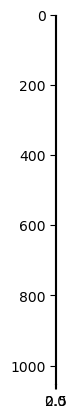

In [8]:
plt.imshow(interpolated)